<a href="https://colab.research.google.com/github/eugenelim831/Face-Detection-Using-CNN-with-Saliency-Map-Bias-Checkers/blob/main/Face_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

The UTKFace dataset is a repositiry of face images that range from an array of ages, gener and race. It is labeled accordingly with the respective aforementioned labels.

Age spans from 0-116, Gender are either male or female, Race ranges from White, Black, Asian, Indian to others (Hispanic, Latino, Middle Eastern), there are also time stamps of when the image was collected. The denotation for the labels are outlined clearly in the dataset document, which are in numbers, ranging from 0-116 for age, 0 / 1 for the two genders and 0-4 for race.

There are about 20K faces that are categorised as "in the wild" which are images where there only one face are present in the said image. The images consist of an array of different oreintations in terms of poses, facial expressions, illumination, occlusion, resolution, etc. This can be said the be essential as this will allow the dataset to be somewhat balanced where a certain variable would not be overrepresented in the dataset, but this will be confirmed later during the data exploration phase.

Facial landmarks are detected with the help of standard keypoint algorithm and crops the faces to 200 x 200 px, therfore reducing any sort of background noise and variability.




# 2. Opening the dataset, Brief data exploration and data pre-processing

In [ ]:
!pip install tf-keras-vis tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.12.0
!pip install -- upgrade numpy == 1.22.3
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
  Atte

ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4259511485886736218
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10977650054613163514
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
Tensorflow version: 2.18.0


In [ ]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from PIL import Image
import glob


from tensorflow.keras.models import Model

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

Since ill only be dealing with White individuals that are of the ages <= 21 and ages 70 - 81, the below code seperates them into 2 class folders, class 0 are the White individuals < 21 and class1 are the white individuals aged 70-81.

In [ ]:
# if images.zip is in /content
!unzip -o /content/trimmed_classes.zip -d /content/trimmed_classes


Archive:  /content/trimmed_classes.zip
  inflating: /content/trimmed_classes/class0/13_0_0_20170110225513115.jpg  
  inflating: /content/trimmed_classes/class0/10_1_0_20170109205141310.jpg  
  inflating: /content/trimmed_classes/class0/15_0_0_20170116201253769.jpg  
  inflating: /content/trimmed_classes/class0/10_1_0_20170109204435809.jpg  
  inflating: /content/trimmed_classes/class0/13_1_0_20170109204923296.jpg  
  inflating: /content/trimmed_classes/class0/10_0_0_20170110220539329.jpg  
  inflating: /content/trimmed_classes/class0/12_0_0_20170117165940524.jpg  
  inflating: /content/trimmed_classes/class0/10_1_0_20170109203501969.jpg  
  inflating: /content/trimmed_classes/class0/15_0_0_20170110225410802.jpg  
  inflating: /content/trimmed_classes/class0/12_1_0_20170109204805155.jpg  
  inflating: /content/trimmed_classes/class0/15_1_0_20170109204314585.jpg  
  inflating: /content/trimmed_classes/class0/12_1_0_20170109204431716.jpg  
  inflating: /content/trimmed_classes/class0/15_1

In [ ]:
from PIL import Image
import glob

# my context here is identification of White faces
# in two age bins: <21 → class0, and 70–81 → class1
# assumes all images are in "images/" and
# there are two empty folders called class0 and class1

for filename in glob.glob('images/*.jpg'):
    # load image (still grayscale if you need)
    im = Image.open(filename)

    # strip off "images/" (chars 0–6) and the trailing "chip.jpg" (last 9 chars)
    filename = filename[7:-9]
    print("metadata:", filename)

    # Remember the filename format [age]_[gender]_[race]_[date&time]
    # gender is the second value (single digit after first underscore)
    gender = int(filename[filename.index("_") + 1])

    # age is everything up to the first underscore
    age = int(filename[:filename.index("_")])

    # --- NEW: extract race (third field) via the second underscore ---
    first_us  = filename.index("_")
    second_us = filename.index("_", first_us + 1)
    race = int(filename[second_us + 1])

    # now your two new conditions for White faces (race == 0):
    if race == 0 and age < 21:
        im.save("class0/" + filename)
        print("\tSaved into class0 folder")

    if race == 0 and 70 <= age <= 81:
        im.save("class1/" + filename)
        print("\tSaved into class1 folder")


Since only 500 images will be used for each class, i have chosen the first 500 images in each class folder to form the target dataset.

In [ ]:
import os, glob
from google.colab import files
import zipfile

# 1) Trim each folder down to its first 500 images
for cls in ['class0', 'class1']:
    files_list = sorted(glob.glob(f'{cls}/*.jpg'))
    # delete any after the first 500
    for f in files_list[500:]:
        os.remove(f)
    print(f"{cls}: kept {len(files_list[:500])} files, removed {len(files_list) - len(files_list[:500])}")

# 2) Zip the two folders together
zip_name = 'trimmed_classes.zip'
with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as z:
    for cls in ['class0', 'class1']:
        for fpath in glob.glob(f'{cls}/*.jpg'):
            # arcname preserves folder structure inside the zip
            z.write(fpath, arcname=os.path.join(cls, os.path.basename(fpath)))

print(f"Created {zip_name}")

# 3) Download the ZIP
files.download(zip_name)


class0: kept 500 files, removed 0
class1: kept 500 files, removed 0
Created trimmed_classes.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import glob

# Define class folders
classes = ['class0', 'class1']

# Collect file paths
filepaths = {cls: sorted(glob.glob(f"{cls}/*.jpg")) for cls in classes}

# Print counts
for cls in classes:
    print(f"{cls:>6}: {len(filepaths[cls])} images")


class0: 500 images
class1: 500 images


Some initial exploration on shape and pixel size of the images.

In [ ]:
from PIL import Image
import numpy as np

# Load one sample from each class
samples = {cls: Image.open(paths[0]) for cls, paths in filepaths.items()}

for cls, img in samples.items():
    arr = np.array(img)
    print(f"{cls:>6} sample shape: {arr.shape}, dtype: {arr.dtype}, "
          f"min/max pixel: {arr.min()}/{arr.max()}")


class0 sample shape: (200, 200, 3), dtype: uint8, min/max pixel: 0/255
class1 sample shape: (200, 200, 3), dtype: uint8, min/max pixel: 0/251


Just some visualisation to see if the files were actually seperated correctly and to just have somehwat of a visual aid on what images we are dealing with.

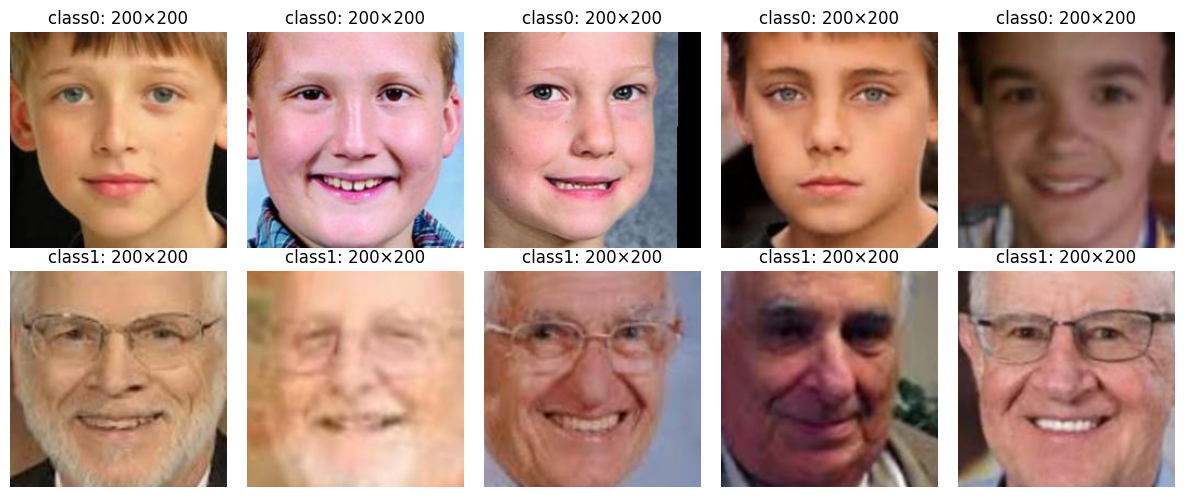

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, cls in enumerate(classes):
    for j, img_path in enumerate(filepaths[cls][:5]):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"{cls}: {img.size[0]}×{img.size[1]}")
plt.tight_layout()
plt.show()


Loading and dividing the classes so that it can be worked into the model.

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 64
h = 64

# Load data
X =[]
Y =[]

for filename in glob.glob('class0/*.jpg'):
    # Convert each image to greay scale
    im=Image.open(filename).convert('L')

    # Resize the images
    # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
    im = im.resize((w,h),Image.Resampling.LANCZOS)

    # Convert to numpy array
    arr = np.array(im)

    # add images and class to the two lists
    X.append(arr)
    Y.append(0)  # age <21 class

# same below
for filename in glob.glob('class1/*.jpg'):
    im=Image.open(filename).convert('L')
    # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    arr = np.array(im)
    X.append(arr)
    Y.append(1)  # age 70-81 class



# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], w, h, 1).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

Just some light initial investigation on the dataset using defalut batch size of 32, kernel size of 3 x 3.

Epoch 1/10
21/21 [==============================] - 3s 106ms/step - loss: 0.9015 - acc: 0.4843 - val_loss: 0.6920 - val_acc: 0.5136
Epoch 2/10
21/21 [==============================] - 2s 99ms/step - loss: 0.6931 - acc: 0.5262 - val_loss: 0.6882 - val_acc: 0.5076
Epoch 3/10
21/21 [==============================] - 2s 112ms/step - loss: 0.6840 - acc: 0.5561 - val_loss: 0.6671 - val_acc: 0.6254
Epoch 4/10
21/21 [==============================] - 3s 137ms/step - loss: 0.6326 - acc: 0.7085 - val_loss: 0.5835 - val_acc: 0.7462
Epoch 5/10
21/21 [==============================] - 2s 101ms/step - loss: 0.5036 - acc: 0.7862 - val_loss: 0.4538 - val_acc: 0.8006
Epoch 6/10
21/21 [==============================] - 2s 98ms/step - loss: 0.3785 - acc: 0.8445 - val_loss: 0.4169 - val_acc: 0.7946
Epoch 7/10
21/21 [==============================] - 2s 98ms/step - loss: 0.3094 - acc: 0.8714 - val_loss: 0.3424 - val_acc: 0.8338
Epoch 8/10
21/21 [==============================] - 2s 100ms/step - loss: 0.250

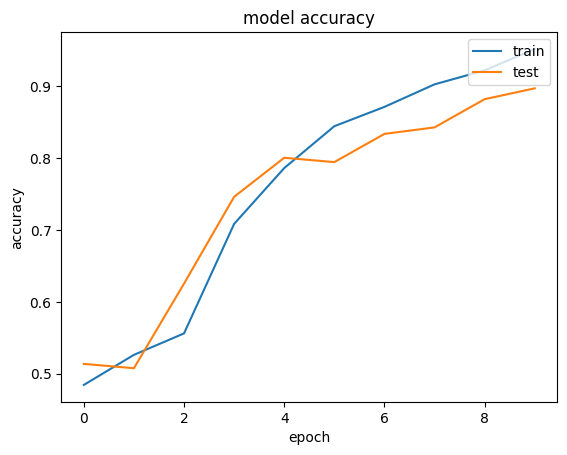

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Here im trying to determine whats a good batch size to use later down the pipeline. This means trying to find a batch size with a smooth learning curve and one with the least over and underfitting. Not using any batch size larger than 500, as there are only 500 image, even the use of batch size 450 was just for confirmation and was never going to be used later on.

Batch Size: 8


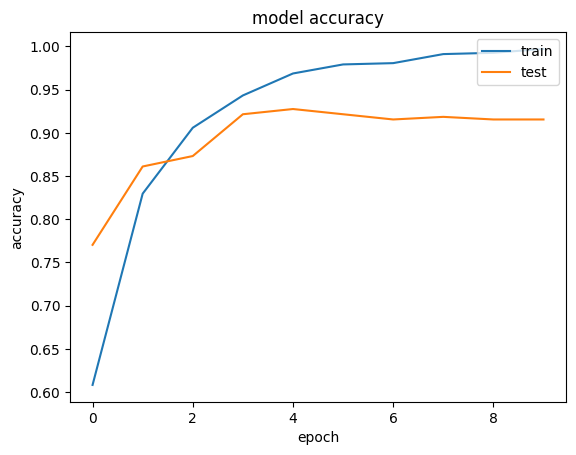

Batch Size: 24


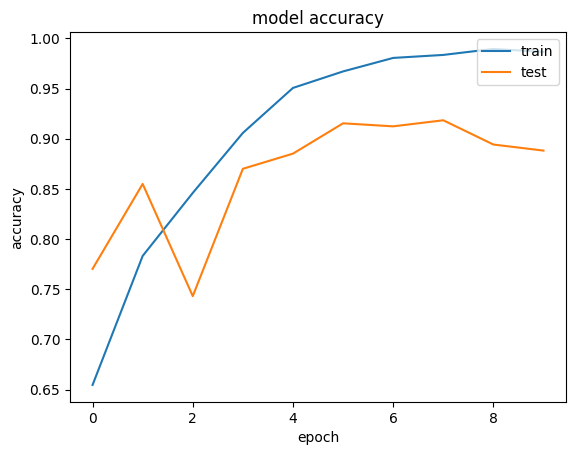

Batch Size: 32


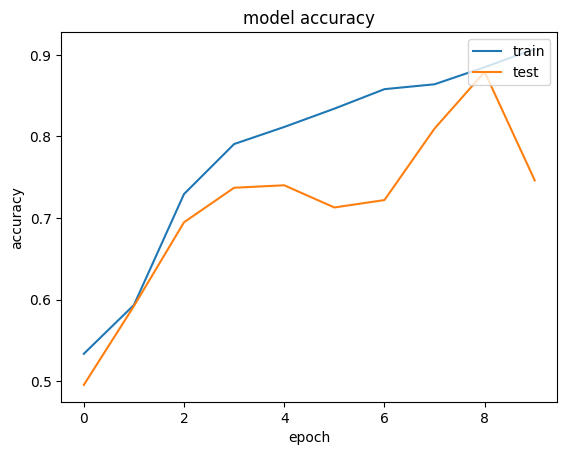

Batch Size: 64


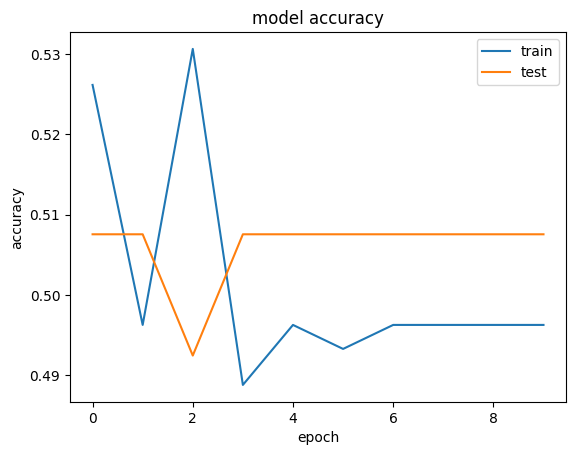

Batch Size: 84


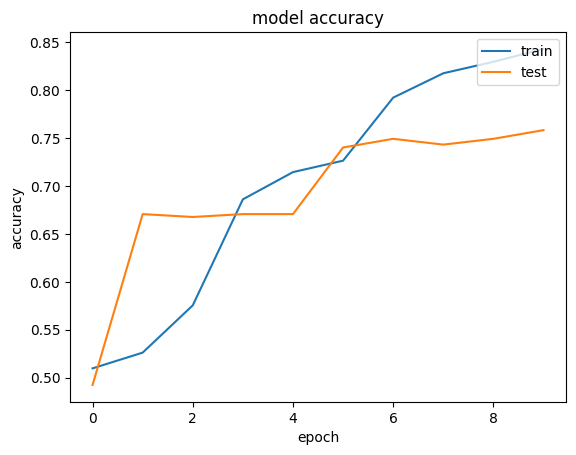

Batch Size: 100


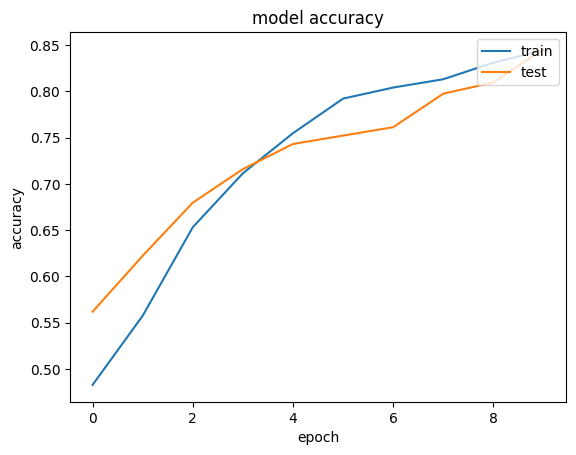

Batch Size: 200


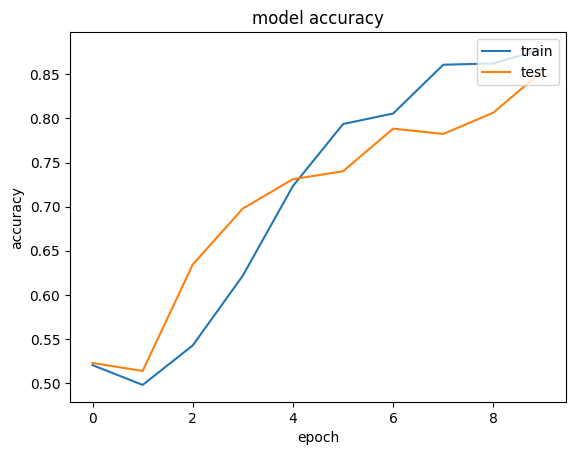

Batch Size: 300


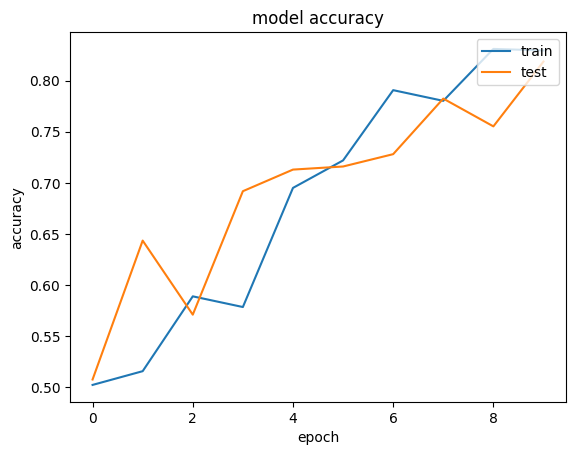

Batch Size: 400


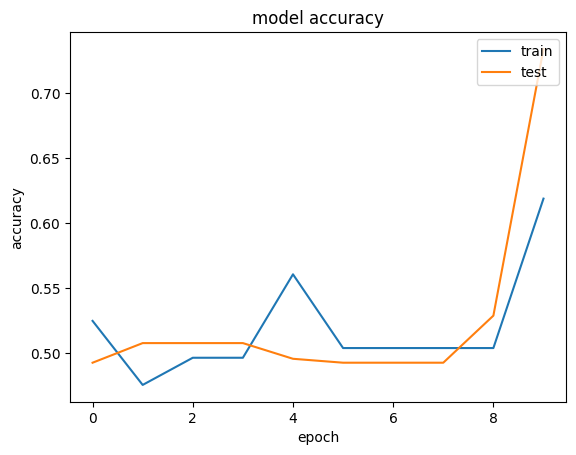

Batch Size: 450


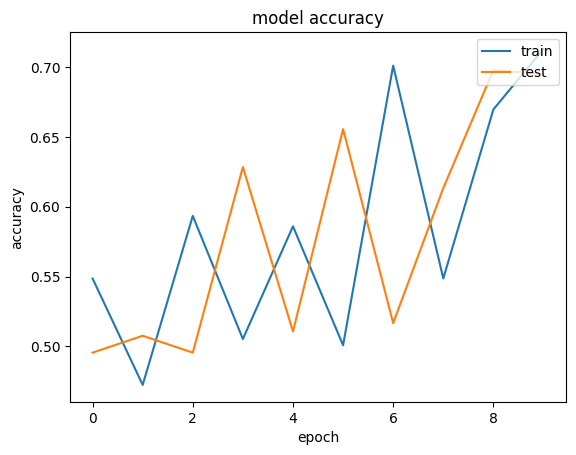

In [ ]:
batchSizes = [8,24,32,64,84,100,200,300,400,450] # can not use bigger than 500 as only 500  images
np.random.seed(seed)
tf.random.set_seed(seed)

for bs in batchSizes:
    modelC = Sequential()
    modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
    modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

    modelC.add(Flatten())
    modelC.add(Dense(128, activation='relu'))
    modelC.add(Dense(num_classes, activation='softmax'))


    modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    # Fit the model
    history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=bs, verbose=0)

    print("Batch Size:", bs)
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

I will be selecting going forward:
Batch size: 24

The reason for choosing this is due to the accuracy and relatively smooth learning curve as seen above, also in contrast to the other models, it for the most part was not over or onder fitted for the training.

# 3. Model exploration to determine network topology (convolutional layers and dense layers

## Topology 1

This topology was mainly built to establish a baseline that shows the lower boundaries of the model. This is to also show and verify that the previous processes that we have done were correct, such as, was the data were loading correctly? was the pre-processing incorrect?

The reasoning behind using 16 filters was to see if the model can or cannot learn with minimal parameters. So if the model showed signs of substantial learning, we know that the the dataset isnt too big for it but if there are evidence that the model is unable to learn from the data, it means that the data is too large and too little parameter are avaiable for the model to learn anything meaningfully.

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - acc: 0.5185 - loss: 0.8842 - val_acc: 0.4955 - val_loss: 0.6946
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6051 - loss: 0.6579 - val_acc: 0.7251 - val_loss: 0.5964
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7844 - loss: 0.5461 - val_acc: 0.7613 - val_loss: 0.5120
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8129 - loss: 0.4584 - val_acc: 0.8066 - val_loss: 0.4466
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8545 - loss: 0.3917 - val_acc: 0.8278 - val_loss: 0.4060
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8735 - loss: 0.3433 - val_acc: 0.8429 - val_loss: 0.3781
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8833 - loss: 0.3103 - val_acc: 0.8459 - val_loss: 0.3600
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9006 - loss: 0.2852 - val_acc: 0.8369 - val_loss: 0.3592
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9072 - loss:

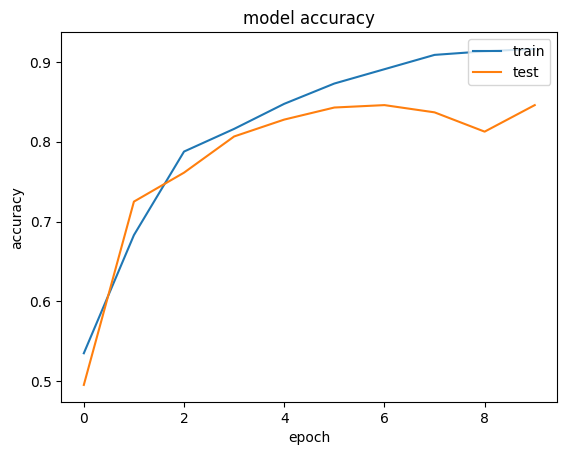

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(16, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(32, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=24, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

We can see that meaningful learning has been done by the model, this can be seen by the somewhat close convergence that could happen with more epochs. We can also see that the curve rises together which can be categorised as a good fit curve or good generalisation of the model.

## Topology 2

Here we are just working from the baseline topology that we have created above in topology 1. Here we used 2 conv layers, by stacking both together we give the model more compacity to combine feature together to get a better learning curve. Were just trying to increaser parameters of the model slightly so that the model "sees' more of the image in the dataset.

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - acc: 0.5229 - loss: 0.7144 - val_acc: 0.5680 - val_loss: 0.6812
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6800 - loss: 0.6605 - val_acc: 0.7221 - val_loss: 0.5691
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7751 - loss: 0.5249 - val_acc: 0.7946 - val_loss: 0.4509
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8382 - loss: 0.4311 - val_acc: 0.8218 - val_loss: 0.4009
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8564 - loss: 0.3812 - val_acc: 0.8459 - val_loss: 0.3681
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8956 - loss: 0.3211 - val_acc: 0.8399 - val_loss: 0.3601
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8945 - loss: 0.2855 - val_acc: 0.8399 - val_loss: 0.3477
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9177 - loss: 0.2481 - val_acc: 0.8973 - val_loss: 0.2674
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9341 

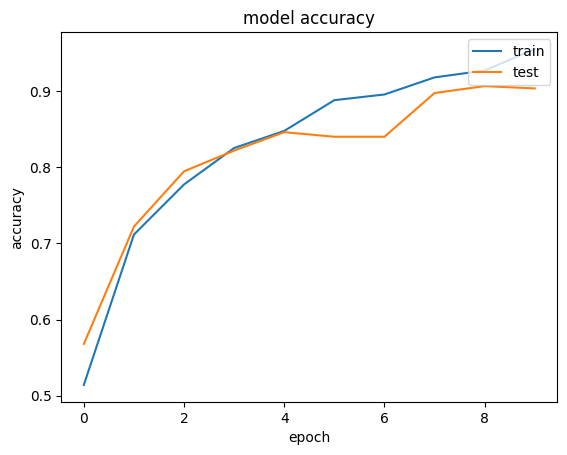

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Flatten())
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

There seems to be better convergence than topology 1. The curves are closer together and their plateau are closer together. Learning curve is also smooth here.

## Topology 3

Here were trying an alternating deep CNN. Were trying out a larger toplogy for one but were also testing if an extra classifier depth reveals a better division in the features than just the one layer that were in topology 1 and 2.

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - acc: 0.4802 - loss: 0.6992 - val_acc: 0.5076 - val_loss: 0.6837
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5932 - loss: 0.6568 - val_acc: 0.6556 - val_loss: 0.6241
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.6818 - loss: 0.5668 - val_acc: 0.7915 - val_loss: 0.4732
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8201 - loss: 0.4428 - val_acc: 0.7885 - val_loss: 0.4469
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8668 - loss: 0.3477 - val_acc: 0.8640 - val_loss: 0.3048
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8906 - loss: 0.2653 - val_acc: 0.8792 - val_loss: 0.3049
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8807 - loss: 0.2996 - val_acc: 0.9033 - val_loss: 0.2846
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9175 - loss: 0.2222 - val_acc: 0.8912 - val_loss: 0.2933
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9332

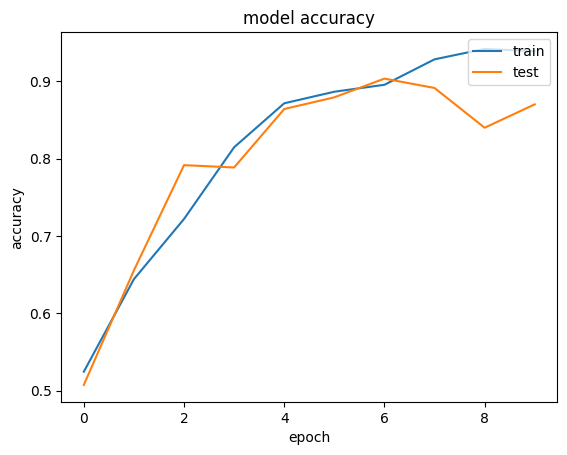

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Doesnt show much differnce in terms of convergence than topology 2. On the contrary, convergence seem worse than topology 2 and the train curve is less smooth and there seems to be slight overfitting when compared to the second topology.

## Topology 4

On the complete other side of the spectrum than topology 1, we will be testing the upper bounds of the topology selction process here. Were pushing both convulutional and dense width to show the limits of this topology on the dataset. 32 - 64 - 128 was used to test if the 1000 image dataset supports deep features.

256 - 128 dense layers was to show if it could learn deep features or will the model just overfit.

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - acc: 0.4721 - loss: 0.6992 - val_acc: 0.4924 - val_loss: 0.6939
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5300 - loss: 0.6872 - val_acc: 0.7069 - val_loss: 0.6092
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.6295 - loss: 0.6469 - val_acc: 0.7553 - val_loss: 0.5285
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7358 - loss: 0.5418 - val_acc: 0.7976 - val_loss: 0.4598
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8203 - loss: 0.4490 - val_acc: 0.8399 - val_loss: 0.3948
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8305 - loss: 0.4050 - val_acc: 0.8066 - val_loss: 0.4217
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8479 - loss: 0.3768 - val_acc: 0.8308 - val_loss: 0.3591
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8655 - loss: 0.3353 - val_acc: 0.8399 - val_loss: 0.3932
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8771 

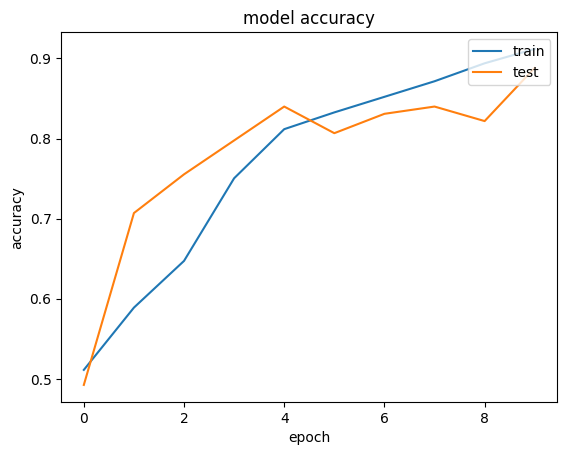

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(128, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Flatten())
modelC.add(Dense(256, activation='relu'))
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In contrast with topology 3, we can see that the lines arent as smooth and seems to be more noise displayed by the model but in the end doesnt really differ much from it. This shows that even with a more complicated and denser network, we dont really see much improvement in terms of learning and accuracy. Convergence seems to be relatively similar as well.

## Conclusion


Topology 2 that has the 2 conv layers will be chosen By stacking both together we give the model more robust compacity to combine feature together to get a better learning curve.

# 4. Hyperparameter investigation (kernel size only)

## Kernel Sizes

kernel Size: 3


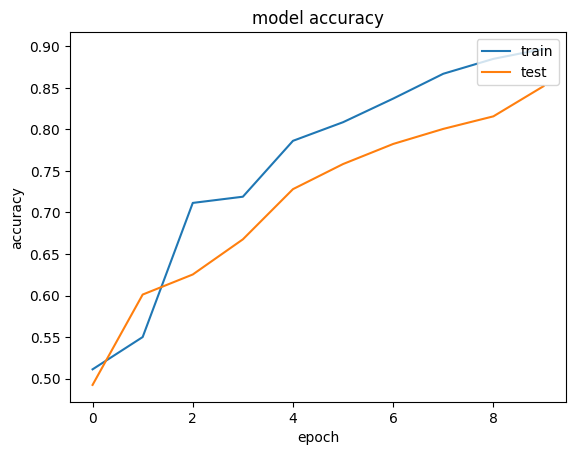

kernel Size: 5


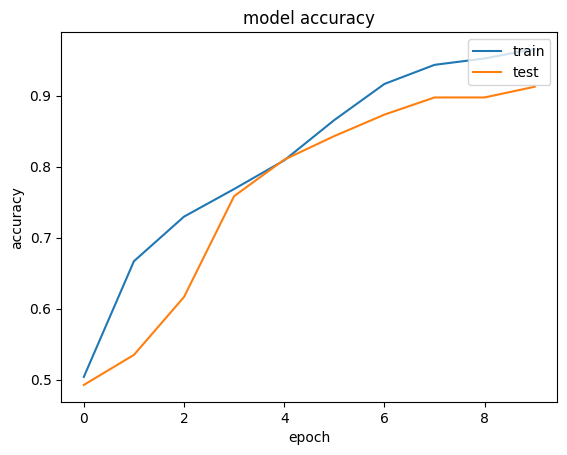

kernel Size: 7


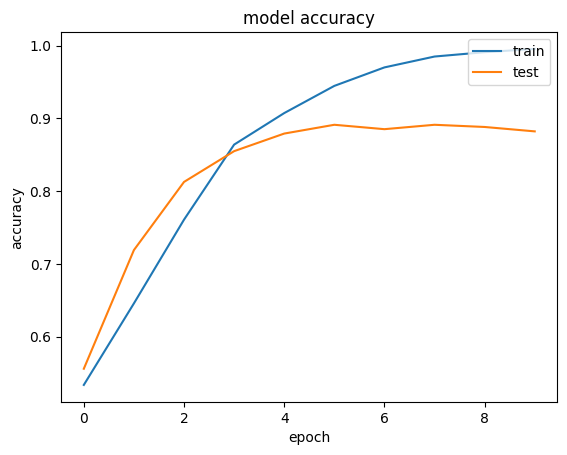

In [ ]:
kernelSizes = [3,5,7]
np.random.seed(seed)
tf.random.set_seed(seed)

for ks in kernelSizes:
    modelC = Sequential()
    modelC.add(Conv2D(32, (ks, ks), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
    modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

    modelC.add(Flatten())
    modelC.add(Dense(128, activation='relu'))
    modelC.add(Dense(num_classes, activation='softmax'))


    modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    # Fit the model
    history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=0)

    print("kernel Size:", ks)
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

3×3 kernel:

3×3 is the industry standard in terms of kernal size,we can see that the model learns basic edges and textures but misses the larger contextual meaning when learning which can be sais to be limiting its discriminative power.

5×5 kernel

By capturing a broader and larger 5×5 patch in one go, the network seems to be able to pick up on mid-level facial patterns like eye-nose spacing without blowing up parameter count too much. This boost generalization in the model.

7×7 kernel

Here we can see clear overfitting in the model where the curves do not converge.

The 5×5 kernal size in this case seems to be the best balance: it significantly outperforms the 3×3 kernal size without the over-smoothing and parameter bloat of 7×7. We therefore chose 5×5 kernels for all subsequent convolutional layers.

# 5. Most appropriate model selection


After a comprehensive review on all the topology and regularisation tehcniques topology 2 and kernal size was chosen as the final model.

The reason for this was due to the better generalization acheived.The chosen model achieved the highest validation accuracy about 92–93 % with only a ~3 % gap to training, showing thatit was able to learn meaningfully from the data sret and without over-fitting.


The model chosen also converges in under 10 epochs with steady train/val curves, showing both meaningful learning and stability across hyperparameter pipelines.

Using 5×5 kernels (from our hyperparameter tuning phase) gave it the best trade-off between local detail and context, outperforming both smaller (3×3) and larger (7×7) kernal sizes.


# 6. Analysis of performance per class and unseen data (10 per class including saliency maps for (unseen data)

## Fitting the final model that we will be using

Epoch 1/10
28/28 [==============================] - 6s 171ms/step - loss: 0.7019 - acc: 0.5441 - val_loss: 0.6974 - val_acc: 0.4924
Epoch 2/10
28/28 [==============================] - 6s 216ms/step - loss: 0.6300 - acc: 0.6502 - val_loss: 0.6013 - val_acc: 0.6616
Epoch 3/10
28/28 [==============================] - 5s 164ms/step - loss: 0.5735 - acc: 0.7055 - val_loss: 0.4761 - val_acc: 0.7915
Epoch 4/10
28/28 [==============================] - 6s 207ms/step - loss: 0.4501 - acc: 0.7877 - val_loss: 0.4464 - val_acc: 0.8218
Epoch 5/10
28/28 [==============================] - 5s 165ms/step - loss: 0.4266 - acc: 0.8087 - val_loss: 0.4502 - val_acc: 0.7492
Epoch 6/10
28/28 [==============================] - 5s 172ms/step - loss: 0.3584 - acc: 0.8386 - val_loss: 0.5190 - val_acc: 0.7190
Epoch 7/10
28/28 [==============================] - 6s 218ms/step - loss: 0.3343 - acc: 0.8670 - val_loss: 0.3279 - val_acc: 0.8610
Epoch 8/10
28/28 [==============================] - 5s 169ms/step - loss: 0.

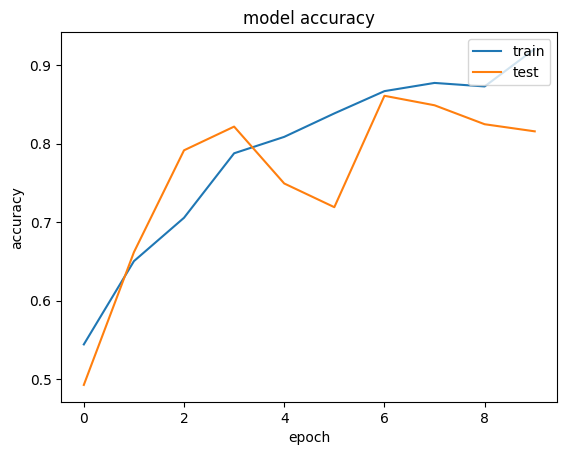

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (5, 5), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(64, (5, 5), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Flatten())
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=24, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Loading the 10 unseen data for each class

Used faces from the UTK dataset that were bnot used in the previous class files. Since there were an excess of images from the requires 500, i have chosen 10 from each class from the aforementioend excess.

In [ ]:
# if images.zip is in /content
!unzip -o /content/test.zip -d /content/test


Archive:  /content/test.zip
   creating: /content/test/test/
   creating: /content/test/test/testClass0/
   creating: /content/test/test/testClass1/
  inflating: /content/test/test/testClass0/20_1_0_20170103175525991.jpg  
  inflating: /content/test/__MACOSX/test/testClass0/._20_1_0_20170103175525991.jpg  
  inflating: /content/test/test/testClass0/20_0_0_20170120133547085.jpg  
  inflating: /content/test/__MACOSX/test/testClass0/._20_0_0_20170120133547085.jpg  
  inflating: /content/test/test/testClass0/20_0_0_20170117141002911.jpg  
  inflating: /content/test/__MACOSX/test/testClass0/._20_0_0_20170117141002911.jpg  
  inflating: /content/test/test/testClass0/20_0_0_20170117141041394.jpg  
  inflating: /content/test/__MACOSX/test/testClass0/._20_0_0_20170117141041394.jpg  
  inflating: /content/test/test/testClass0/20_1_0_20170103163056975.jpg  
  inflating: /content/test/__MACOSX/test/testClass0/._20_1_0_20170103163056975.jpg  
  inflating: /content/test/test/testClass0/20_1_0_201701

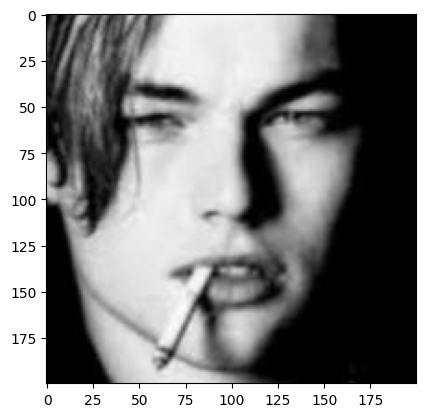

1/1 [==============================] - 0s 235ms/step
Predicted as
Class 1


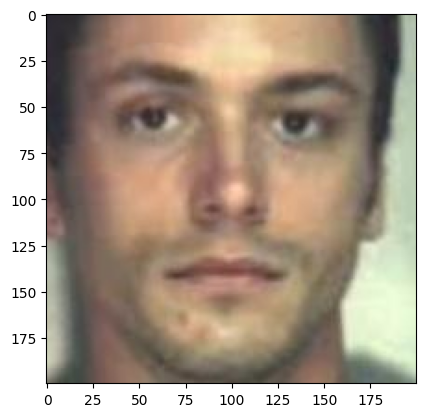

1/1 [==============================] - 0s 49ms/step
Predicted as
Class 1


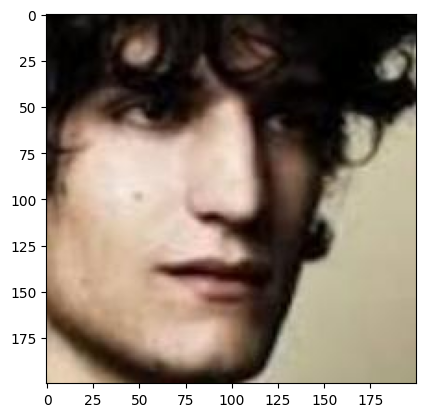

1/1 [==============================] - 0s 69ms/step
Predicted as
Class 0


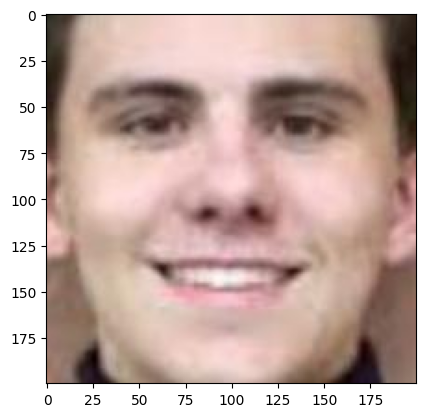

1/1 [==============================] - 0s 80ms/step
Predicted as
Class 1


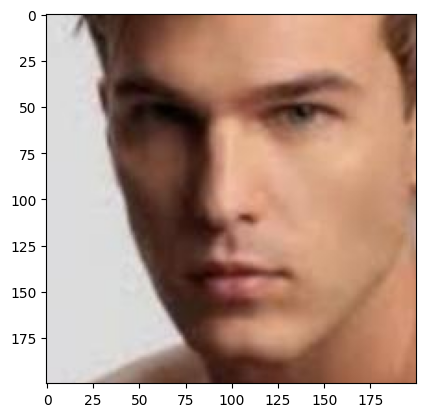

1/1 [==============================] - 0s 50ms/step
Predicted as
Class 1


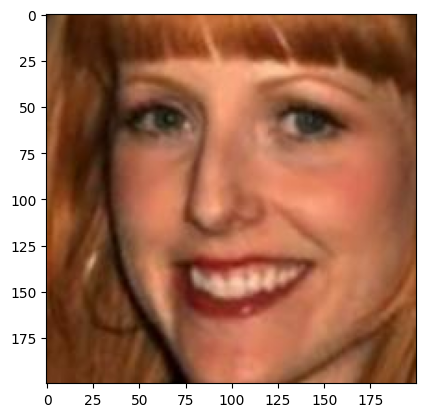

1/1 [==============================] - 0s 65ms/step
Predicted as
Class 0


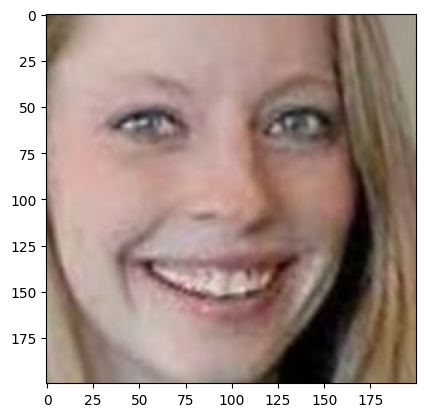

1/1 [==============================] - 0s 91ms/step
Predicted as
Class 1


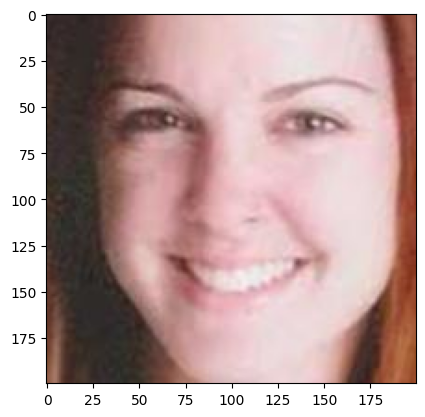

1/1 [==============================] - 0s 70ms/step
Predicted as
Class 1


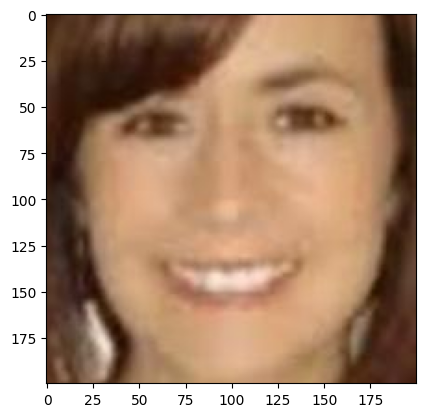

1/1 [==============================] - 0s 34ms/step
Predicted as
Class 0


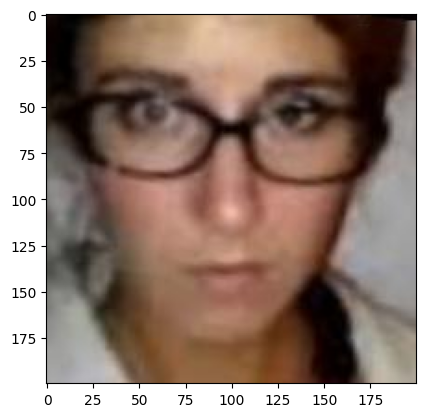

1/1 [==============================] - 0s 29ms/step
Predicted as
Class 1


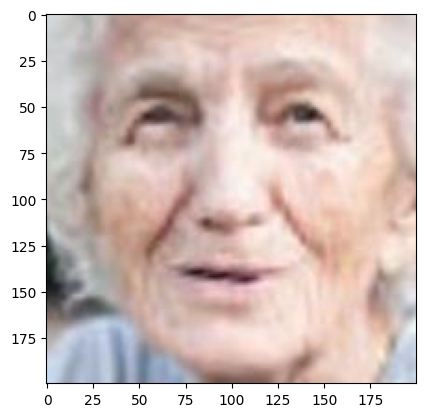

1/1 [==============================] - 0s 61ms/step
Predicted as
Class 1


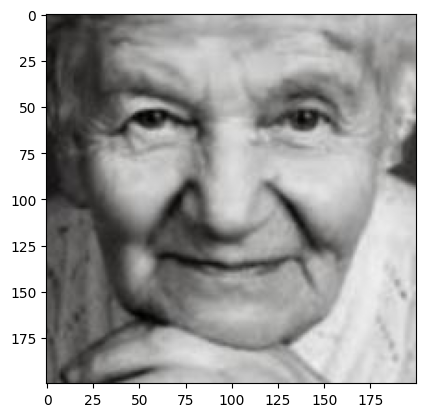

1/1 [==============================] - 0s 42ms/step
Predicted as
Class 1


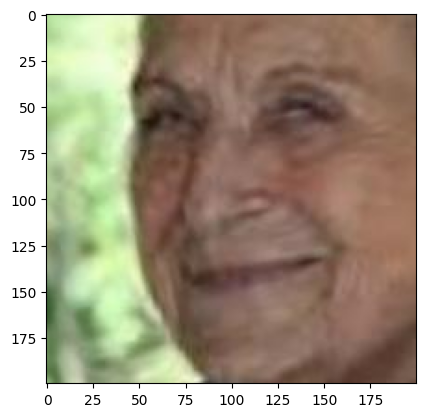

1/1 [==============================] - 0s 20ms/step
Predicted as
Class 1


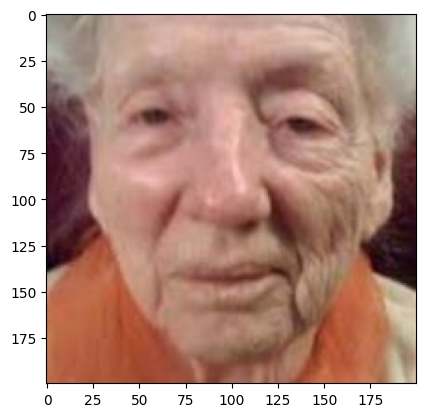

1/1 [==============================] - 0s 37ms/step
Predicted as
Class 1


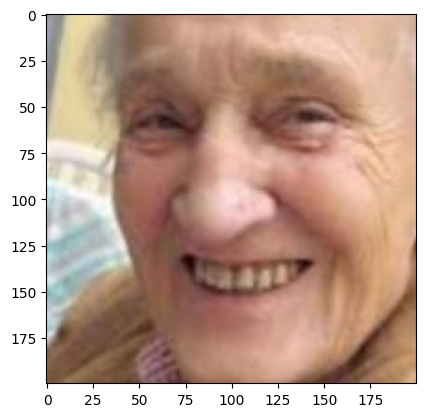

1/1 [==============================] - 0s 103ms/step
Predicted as
Class 1


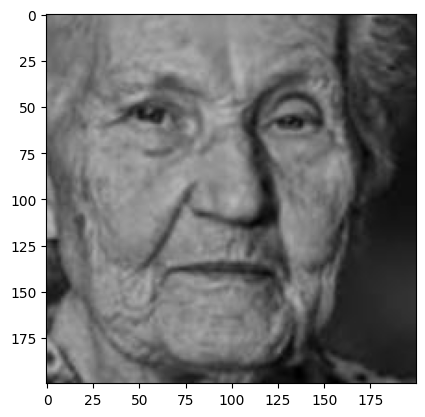

1/1 [==============================] - 0s 107ms/step
Predicted as
Class 1


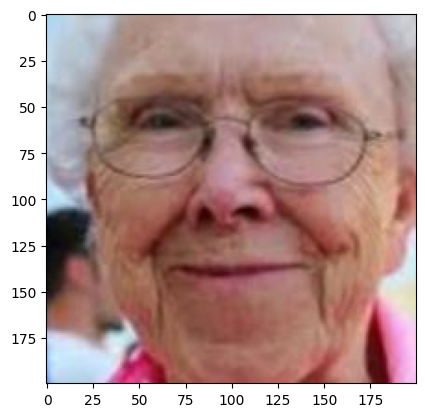

1/1 [==============================] - 0s 90ms/step
Predicted as
Class 1


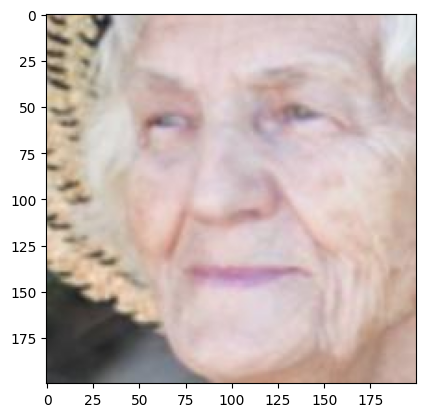

1/1 [==============================] - 0s 34ms/step
Predicted as
Class 1


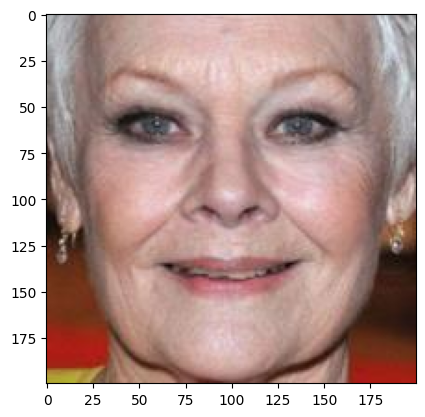

1/1 [==============================] - 0s 31ms/step
Predicted as
Class 1


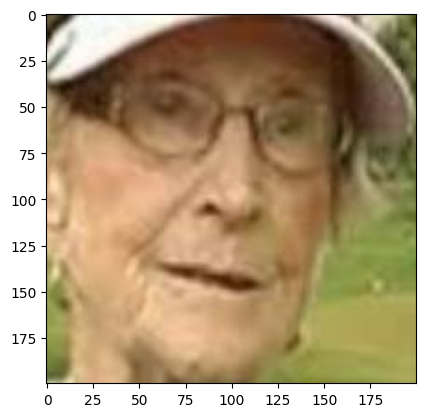

1/1 [==============================] - 0s 29ms/step
Predicted as
Class 1



Model Accuracy: 65.0 %


In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0


for filename in glob.glob('testClass0/*.jpg'):
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    im = np.array(im)
    # reshape to be [samples][channels][width][height]
    im = im.reshape(1, w, h, 1).astype('float32')
    # Normalize the data
    im = im /255
    result = modelC.predict(im)
    result = np.argmax(result)
    print("Predicted as")
    if result == 0:
        print("Class 0")
        correct += 1
    else:
        print("Class 1")


for filename in glob.glob('testClass1/*.jpg'):
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    im = np.array(im)
    # reshape to be [samples][channels][width][height]
    im = im.reshape(1, w, h, 1).astype('float32')
    # Normalize the data
    im = im /255
    result = modelC.predict(im)
    result = np.argmax(result)
    print("Predicted as")
    if result == 0:
        print("Class 0")
    else:
        print("Class 1")
        correct += 1

print("\n\n\nModel Accuracy:", (correct/20) * 100, "%")

From here we can see that class0 is struggling to predict the age of the individuals correctly. The accuracy for predicting class0 is a stagerring 30% which isnt good at all as out baseline accuracy should not be lower than a 50% coin flip. We can however see that there is a 100% accuracy rate for class1 which shows the great gap in performance between the classes. We see how the model struggles to see features on one class but not in the other. Saliency maps will be plotted to see areas or features in the faces and images affects its predictions and what could be changed in the model for future improvement of accuracy and robustness.

## Plotting Saliency Maps for Class 0

In [ ]:
def plot_gradcam_plusplus_of_a_model(model, Xt, image_titles, class_values):
    score = CategoricalScore(class_values)
    # Create GradCAM++ visualization object
    gradcam = GradcamPlusPlus(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)
    # Generate heatmap with GradCAM++
    cam = gradcam(score,
                  Xt,
                  penultimate_layer=-1)

    # Plot
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(14, 8))
    for i, title in enumerate(image_titles):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[i].set_title(title, fontsize=16)
        ax[i].imshow(Xraw[i], cmap="gray")
        ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

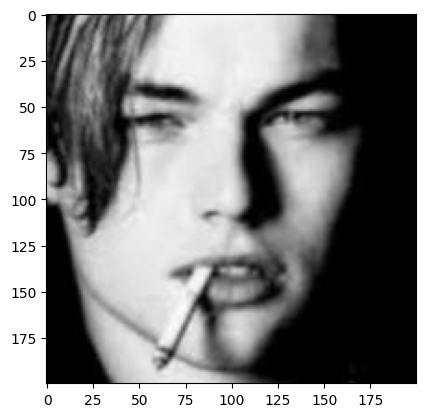

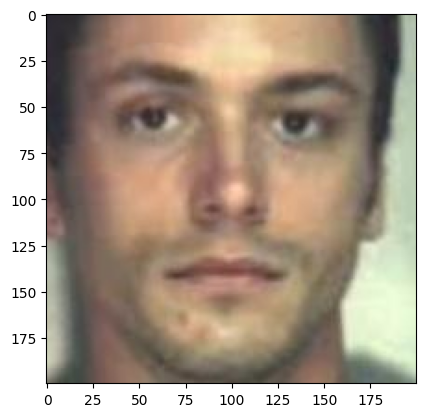

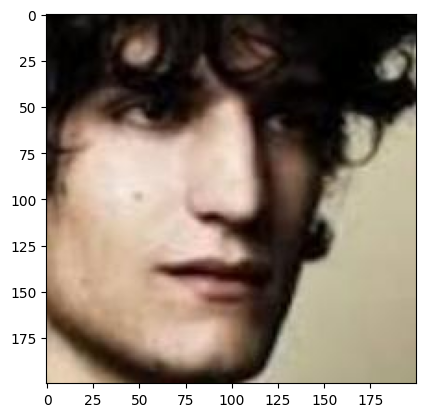

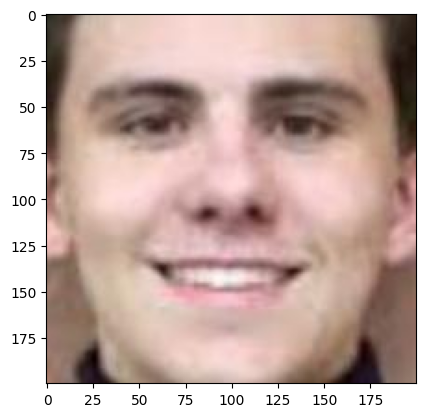

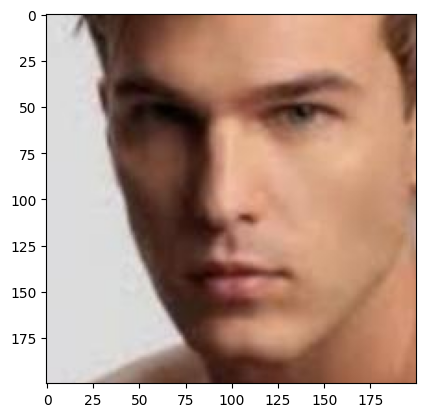

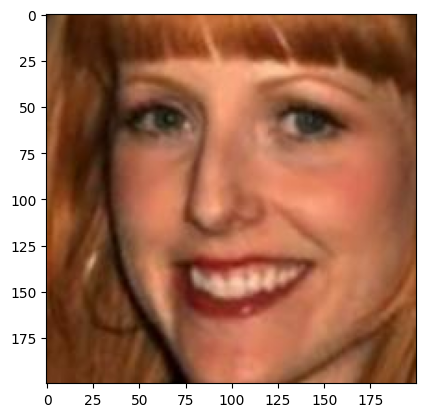

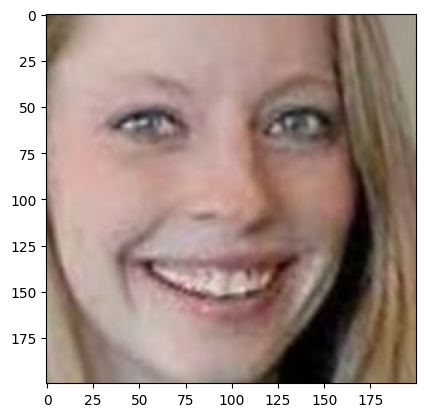

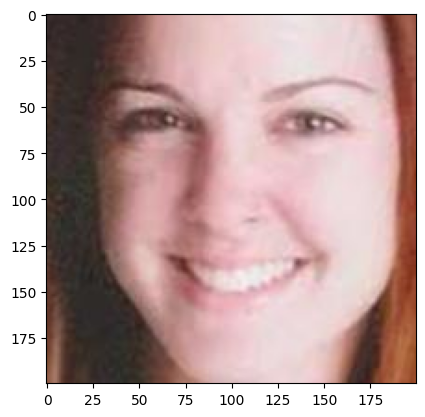

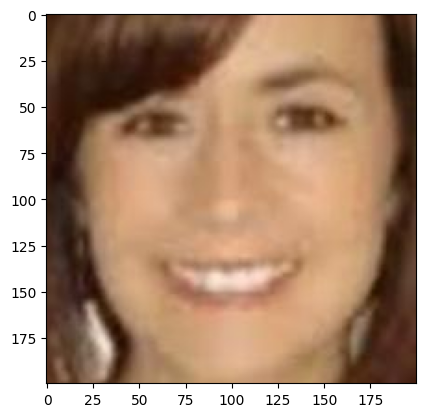

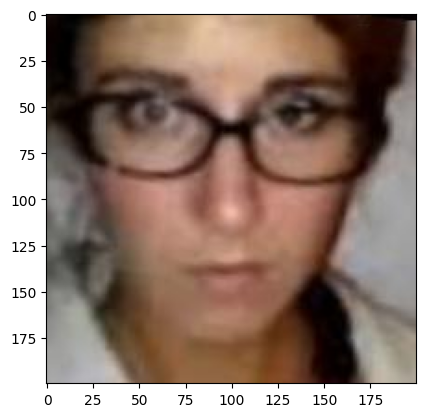

In [ ]:
Xt =[]
Xraw = []
image_titles=[]
class_values=[]
counter = 1

for filename in glob.glob('testClass0/*.jpg')[:10]:
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    Xraw.append(im)

    im = np.array(im)
    # Normalize the data
    im = im /255
    Xt.append(np.array(im))
    name = "Individual" + str(counter)
    counter +=1
    image_titles.append(name)
    class_values.append(0)

Xt = np.asarray(Xt)

Xt = Xt.reshape(Xt.shape[0], w, h, 1).astype('float32')

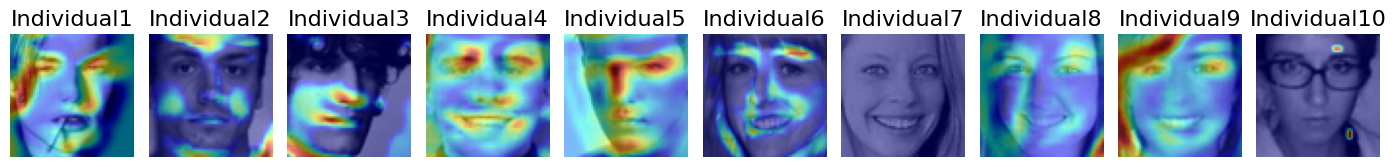

In [ ]:
plot_gradcam_plusplus_of_a_model(modelC, Xt, image_titles, class_values)

Only individuals 3,6,9 were correctly predicted by the model to be class 0, this is as we said before concerning as our baseline accuracy is lower than a coin flip. We can, however, indentify from these maps the regions that are probably causing these discrepencies. For these correctly predicted individuals, we can see that the saliency maps have highlight the regions of the face that can be categorised as most important for the model's decision, such as Eyes, nose, and mouth (which are key facial features).
We can see clearly on the saliency map for individual 3,6 that there is a high emphasis on their nasal and mouth areas which have driven the model for a correct prediction. This can mean that these areas are key regions for the model to have a correct prediction.

As for the rest of the individuals which the model have failed to indentify correctly, these are individuals other than 3,6, and 9, we will try to indentify why this happened. We can see that the model was not focusing on the wrong features as the model was correctly focusing on relevant parts of the image such as nasal and mouth areas, however it also took into account noisy parts of the image, such as background or poorly aligned facial features. This caused confusion in the model and its decision skewed by the fact that other regions were affecting its prediction. We can see this clearly in many of the individuals of the map that either background noise were taken into account of even edges of the faces that were not conclusive to a younger age being a factor in the model's decision.

This comes back to the model focusing on small or ambiguous features, The model focused on minor features that are not key to distinguishing between classes and sometimes taking this to the other side of the spectrum where if the individual had glasses or accesories, it failed to classify or distinguish any meaningful features from the image at all, leading to errors.

The model may have overfitted to specific features in the dataset, such as lighting or background, which are not relevant for classification.

## Plotting Saliency Maps for Class

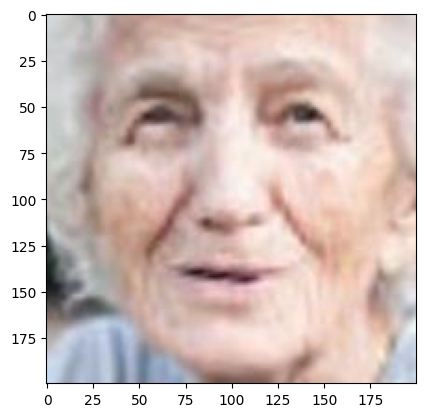

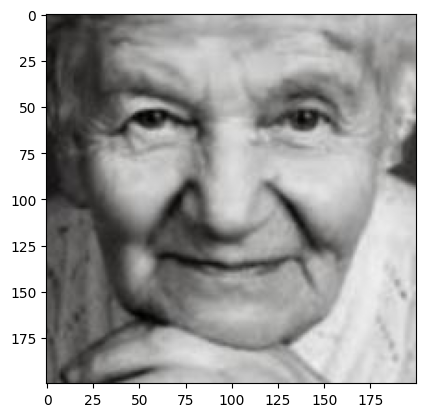

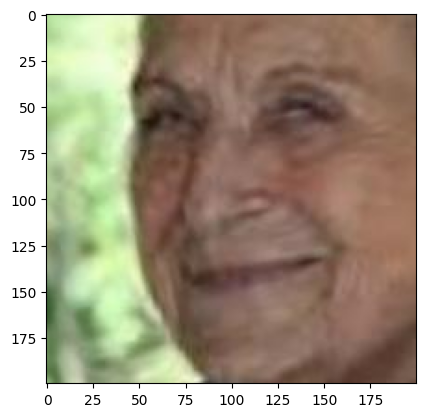

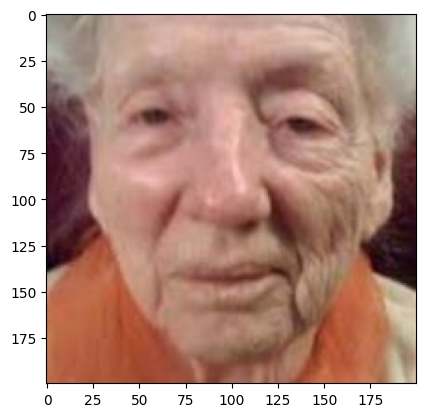

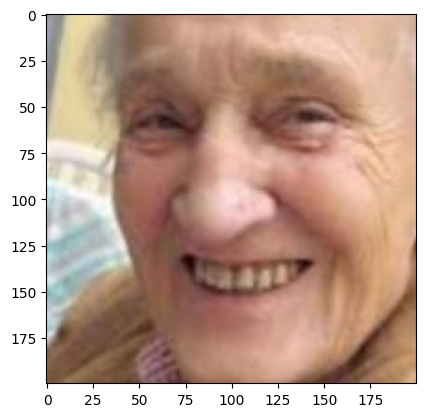

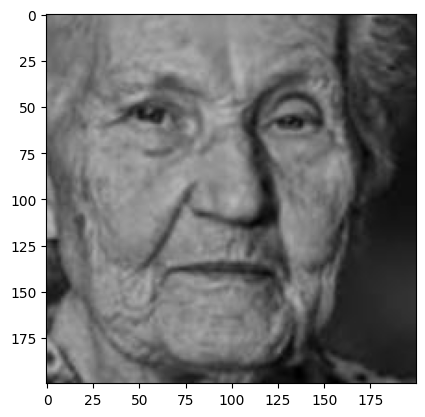

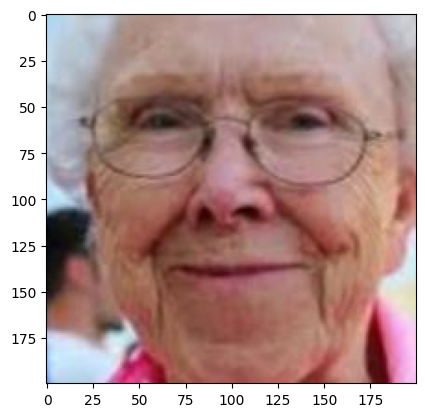

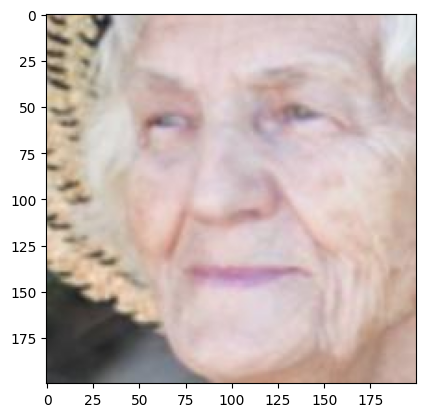

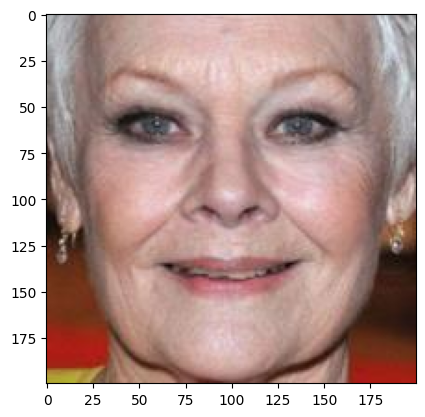

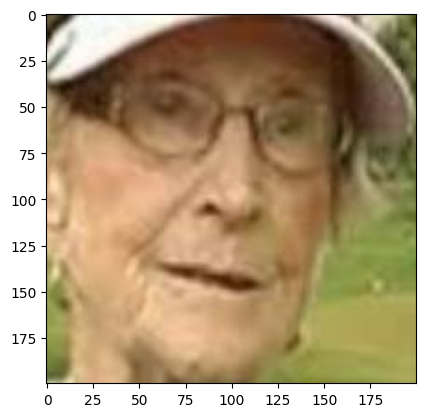

In [ ]:
Xt =[]
Xraw = []
image_titles=[]
class_values=[]
counter = 1

for filename in glob.glob('testClass1/*.jpg')[:10]:
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    Xraw.append(im)

    im = np.array(im)
    # Normalize the data
    im = im /255
    Xt.append(np.array(im))
    name = "Individual" + str(counter)
    counter +=1
    image_titles.append(name)
    class_values.append(0)

Xt = np.asarray(Xt)

Xt = Xt.reshape(Xt.shape[0], w, h, 1).astype('float32')

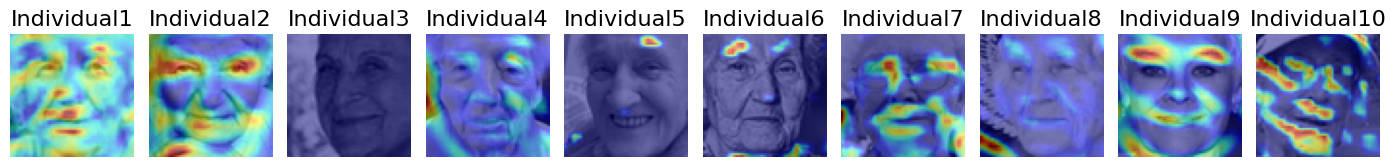

In [ ]:
plot_gradcam_plusplus_of_a_model(modelC, Xt, image_titles, class_values)

All the individuals of the unseen images in testClass1 folder have been correctly predicted as class 1.
The saliency maps show emphasis that the model is giving to different parts and regions of the individual's faces.

For individuals 1 to 10, the saliency maps show which regions of the image and or faces that are the most important for the model’s decision making process.

We can see that as well for class 0 and here, the regions around the eyes, nose, and mouth are consistently deeply highlighted in the saliency maps across the individuals above, this is a clear indication that the model is actively focusing on these distictive features of the individuals and images. This is relatively normal and common for a well-trained model that has a main focus on facial recognition.

The saliency maps do not appear to focus on irrelevant background elements or accessories which cannot be said for most of the individuals in class 0, which does suggests that the model can successfully ignore these factors in favor of the facial features which it couldnt do in class 0, for reasons unknown.

There seems to be consistent focus on the eyes and mouth, especially in Individual 1 and Individual 2 which are the first two saliency maps above, where the eyes, nose, and mouth regions are pin pointed strongly.
Individuals 7, 8, and 9 show similar results, with emphasis on the eyes and upper facial areas.


Indivuduals 1 and 2 eyes are the most prominent feature that the model have highligted to. The maps highlight areas around the eyes, with some attention on the nose and mouth as well.
There is no special or significant focus on non-facial areas such as background or clothing in this case, which could indicate that the model is focusing on the correct regions again.
Individuals 3, 6, and 9 had the model focus on eyes and nose. which are areas consistently highlighted in almost all maps, showing that the model is recognizing these features and parts as important for classification.
It appears to indicate a more balanced attention to the face, without distracting features.
Individuals 4, 5, 7, 8, 10 have their Eyes, mouth, and face focused on consistently, eventhough in Individual 10, the model seemed to focus a bit more on the cheeks or near the jawline, which could be due to specific features of the face.
In all these cases, the saliency map does not show significant attention to background or irrelevant areas.


The saliency maps clearly show that the model is paying attention to important facial features, including eyes, mouth, and nose, across all individuals.
Since all predictions for class 1 are correct, the saliency maps further concludes that the model is focusing on the right facial features for classifying these images.
Additinally, the saliency maps displays a similar pattern of focusing on the eyes and mouth. This suggests that the model has learned robust features for recognizing class 1, such as these facial areas.

 Despite the difference and aigmentation in facial expressions and lighting conditions across the images, the saliency maps show that the model focuses on the key facial features that remain consistent regardless of expression or lighting.
The model performs well across all these images suggests it is generalizing effectively to different individuals in the class and learning key facial features. The saliency maps further proves this by showing focus on relevant areas.


## Conclusion

For this analysis of saliency maps for class 0 and class 1, we can conclude that the saliency maps for both Class 0 and Class 1 predictions are not equal in any form. The saliency maps however did surface valuable insights into the features that the model focuses on when making its predictions and helped to explain the model's performance across both classes.

For Class 1, all unseen images of the individuals in the folder were predicted correctly, with the saliency maps consistently highlighting the key facial features—eyes, nose, and mouth. This focus on important facial areas show that the model has successfully learned determining facial features for classifying Class 1. The saliency maps further conclude that that the model is focusing on important parts of the face, without being side tracked by background features or non-facial features, which resulted in the model being able to classify all the unseen images of class 1 correctly.

On the contrary, the analysis of Class 0 predictions showed that the model may have focused on less distinguishable features, which therefore lead to misclassifications of the unseen images in the testClass0 folder. The saliency maps for the incorrect predictions in Class 0 showed that the model was  influenced by very noisy background features or detaisl or even minor facial features that did not contribute significantly to distinguishing Class 0 from other classes. This could either mean that the individual had their face tilted slightly or even wearing accesories, such as glasses, etc. This could suggest that there might be issues related to overfitting or the model’s difficulty in generalizing to new images within Class 0.

To add on, the saliency maps helped us understand that the model performs robustly for Class 1, by attending to the most important facial features. However, for Class 0, the model defintely need improvement, putting in special emphasis on areas such as focusing on more crucial and distinguishable facial features while avoiding noise from not so important details. To further enhance the model's performance across both classes, adjusting techniques such as data augmentation abd model fine-tuning, will be needed.

In conclusion, while the model excels at identifying Class 1 based on facial features, its performance on Class 0 could do better from better focus and feature selection to ensure more accurate predictions across both classes.

# 7. Development of a cloud-hosted production model and testing on unseen data (9 per class)

In [ ]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
%matplotlib inline
import time

from PIL import Image
import glob


In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 32
h = 32

# Load data
X =[]
Y =[]

for filename in glob.glob('class0/*.jpg'):
    # Convert each image to greay scale
    im=Image.open(filename).convert('L')

    # Resize the images
    im = im.resize((w,h),Image.Resampling.LANCZOS)

    #Show each image for the CA

    # Convert to numpy array
    arr = np.array(im)

    # add images and class to the two lists
    X.append(arr)
    Y.append(1)  # Jack russel class

# same below
for filename in glob.glob('class1/*.jpg'):
    im=Image.open(filename).convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    arr = np.array(im)
    X.append(arr)
    Y.append(2)  # Ridgeback class



# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]

# in case CPU must be channels last

X = X.reshape(X.shape[0], w, h, 1 ).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

w = 32
h = 32

# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        validation_split=0.2) # we don't expect dogs to be upside-down so we will not flip vertically


# load and iterate training dataset
train_batch_processing = datagen.flow_from_directory('train/',
                                       target_size=(w, h),
                                       color_mode='grayscale',
                                       class_mode='binary',
                                       batch_size=32,
                                       subset='training')
# load and iterate validation dataset
valid_batch_processing = datagen.flow_from_directory('train/',
                                      target_size=(w, h),
                                      color_mode='grayscale',
                                      class_mode='binary',
                                      batch_size=32,
                                      subset='validation')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


Epoch 1/10
28/28 [==============================] - 2s 42ms/step - loss: 0.7466 - acc: 0.4948 - val_loss: 0.6843 - val_acc: 0.5076
Epoch 2/10
28/28 [==============================] - 1s 36ms/step - loss: 0.6467 - acc: 0.6263 - val_loss: 0.5927 - val_acc: 0.7915
Epoch 3/10
28/28 [==============================] - 1s 38ms/step - loss: 0.6074 - acc: 0.6712 - val_loss: 0.5286 - val_acc: 0.7915
Epoch 4/10
28/28 [==============================] - 1s 36ms/step - loss: 0.4942 - acc: 0.7773 - val_loss: 0.4501 - val_acc: 0.8157
Epoch 5/10
28/28 [==============================] - 1s 36ms/step - loss: 0.4569 - acc: 0.7848 - val_loss: 0.4333 - val_acc: 0.8278
Epoch 6/10
28/28 [==============================] - 1s 37ms/step - loss: 0.4040 - acc: 0.8221 - val_loss: 0.5539 - val_acc: 0.6858
Epoch 7/10
28/28 [==============================] - 1s 35ms/step - loss: 0.3967 - acc: 0.8386 - val_loss: 0.3884 - val_acc: 0.8338
Epoch 8/10
28/28 [==============================] - 1s 36ms/step - loss: 0.3763 - a

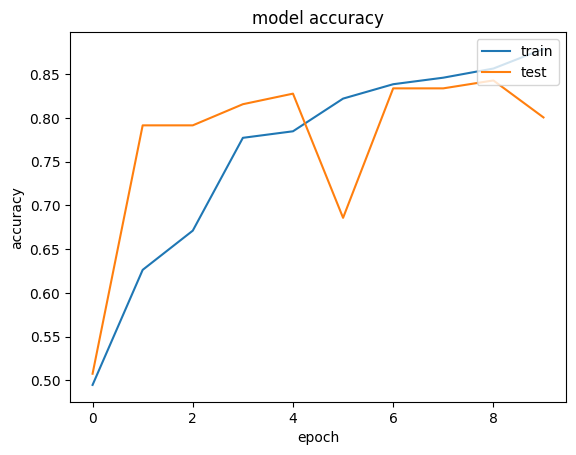

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (5, 5), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Conv2D(64, (5, 5), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelC.add(Flatten())
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=24, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
ts = int(time.time())
file_path = f"C:/production/{ts}/"
modelC.save(filepath=file_path, save_format='tf')

In [ ]:
import requests
import json

w = 32
h = 32

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0

#url = 'http://localhost:8501/v1/models/img_classifier:predict'
url = 'http://13.86.213.126:8501/v1/models/img_classifier:predict'

def make_prediction(instances):
    data = json.dumps({"signature_name": "serving_default", "instances": instances.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)["predictions"]
    return predictions


rawImages = []
instances = []


for filename in glob.glob('testClass0*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)


for filename in glob.glob('testClass1*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.Resampling.LANCZOS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)


instances = np.array(instances)
instances = instances.reshape(instances.shape[0],w, h, 1).astype('float32')

predictions = make_prediction(instances)

for i, pred in enumerate(predictions):
    imgplot = plt.imshow(rawImages[i])
    plt.show()
    if np.argmax(pred) == 0:
        print("Jack Russel")
    else:
        print("Ridgeback")

ConnectTimeout: HTTPConnectionPool(host='13.86.213.126', port=8501): Max retries exceeded with url: /v1/models/img_classifier:predict (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x781c0066da10>, 'Connection to 13.86.213.126 timed out. (connect timeout=None)'))

# 8. Summary and Conclusion

To summarise my aforementioned thoughts, we can consluse that the model had a hard time dinstinguishing white individuals below the age of 21 than white individuals between the age of 71-81. As we said above, the model seemed to be overfitted no matter what topology we used and was underfitted when we tried smaller networks. In the end, we settled on a middle ground with a somewhat robust accuracy for the size of the network.

When training the model, with the help of the saliency map, we can see that the model really struggle to factor out noise, especially background noise and an additinal obstacle where the model fails to find determining features in the image when the individual was wearing accesories such as glasses, etc. The model also struggles when the face was not completely in frame where it was either tilted, slanted or turned to its side. This could mean many things, but one of the conclusion that we can acheive from the saliency maps on class0 is that the dataset would need to be processes more before feeding it into the model, that means tuning it so that the model would not need to factor out noise and it should be removed beforehand. In terms of accesories, there could be a bias present in the balance of individuals with accesories and that could lead to the model being weak in finding those patterns as there arent enough images of individuals with accesories for the model to learn from.

Additionally, the model seemed to show oustanding resutls for class 1 which are white individuals between the age of 71-81. The reason for it could defintely be due to the fact that these individuals have very dinstict features that the model could learn from. From the saliency maps, we coudl clearly see the wrinkles in the forehead, eyes and areas around the mouth to be the distinguishing features that the jmodel have strongly highlighted. These are features that are not so clearly presented in class 0 and therefore the model was unable to classify those images.

My conclusive thoughts are that the model would definitely need fine tuning, however, fine tuning the dataset would be of much better efficiency as the model can only be tuned so much that accuracy would seem to only improve negligibly.